In [4]:
!pip install librosa soundfile pyaudio

  Using cached librosa-0.10.2.post1-py3-none-any.whl (260 kB)
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)
                                              0.0/164.1 kB ? eta -:--:--
     -------------------------------------- 164.1/164.1 kB 4.8 MB/s eta 0:00:00
                                              0.0/184.7 kB ? eta -:--:--
     -------------------------------------- 184.7/184.7 kB 5.5 MB/s eta 0:00:00


In [52]:
import soundfile
import librosa
import os, glob, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [29]:

def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            result = np.hstack((result, mel))
    return result

In [30]:
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}
observed_emotions = ['calm', 'happy', 'fearful', 'disgust']

In [31]:
def load_data(test_size=0.2):
    x, y = [], []
    for file in glob.glob("D:/Study/Dataset/Speech Emotion/Actor_*/*.wav"):
        file_name = os.path.basename(file)
        emotion = emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)


In [45]:
def plot_emotion_distribution(y_train, y_test):
    # Combine y_train and y_test into a single list
    y_combined = y_train + y_test
    # Convert the list to a pandas series
    y_series = pd.Series(y_combined)
    # Plot using seaborn countplot
    sns.countplot(y=y_series)
    plt.title("Distribution of Emotions")
    plt.xlabel("Emotions")
    plt.ylabel("Count")
    plt.show()


In [50]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=observed_emotions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=observed_emotions)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

In [41]:
def predict_emotion(file_path):
    feature = extract_feature(file_path, mfcc=True, chroma=True, mel=True).reshape(1, -1)
    prediction = model.predict(feature)
    return prediction[0]

In [32]:
x_train, x_test, y_train, y_test = load_data(test_size=0.25)

In [33]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [34]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [35]:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [36]:
#DataFlair - Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [37]:
#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

In [38]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 60.42%


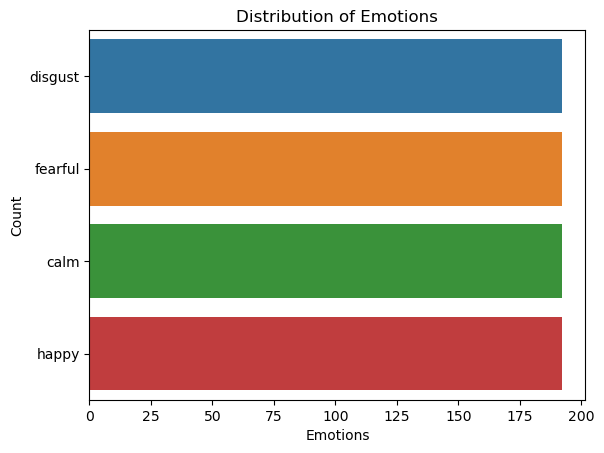

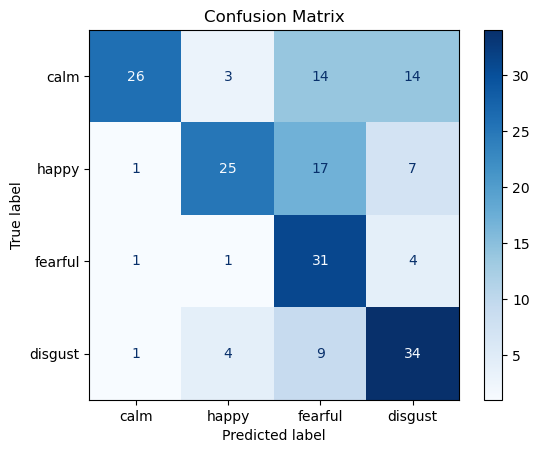

In [53]:
plot_emotion_distribution(y_train, y_test)
plot_confusion_matrix(y_test, y_pred)

In [54]:
file_path = 'D:/Study/Dataset/Speech Emotion/test/03-01-01-01-01-01-01.wav'
emotion = predict_emotion(file_path)
print(f'The predicted emotion is: {emotion}')

The predicted emotion is: disgust


In [55]:
file_path = 'D:/Study/Dataset/Speech Emotion/test/03-01-03-01-02-02-01.wav'
emotion = predict_emotion(file_path)
print(f'The predicted emotion is: {emotion}')

The predicted emotion is: disgust


In [56]:
file_path = 'D:/Study/Dataset/Speech Emotion/test/03-01-02-02-01-01-14.wav'
emotion = predict_emotion(file_path)
print(f'The predicted emotion is: {emotion}')

The predicted emotion is: calm


In [57]:
file_path = 'D:/Study/Dataset/Speech Emotion/test/03-01-03-02-01-01-06.wav'
emotion = predict_emotion(file_path)
print(f'The predicted emotion is: {emotion}')

The predicted emotion is: fearful
